
# Heart Disease Prediction
In this project we will using the concepts learnt in machine learning and data science to predict the chances the that a person may have a heart disease based on the medical attribute.

We are going to be taking the following approach:
1. Problem Definition
2. Data
3. Features
4. Exploratory Data Analysis
5. Modelling
6. Experimentation

## 1. Problem Definition
Given the clinical parameters about the patients, we need to build an effective machine learning model to predict whether he/she may or may not have a heart disease. 

## 2. Data
The original dataset came from the cleavland data from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease

However we are using the version of the same dataset which is avaliable on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Features
Out of the 76 attributes only 14 attributes used:


# 4. Exploratory Data Analysis

In [1]:
#Importing the essential libraries and tools we will need:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the data
data=pd.read_csv(r'C:\Users\aditi\OneDrive\Desktop\5th sem\heart_disease_uci.csv')

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.shape

(920, 16)

In [5]:
#checking the missing values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
#Displaying the information about the dataset eg. column names, count, datatype etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [8]:
data["sex"].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [9]:
data["restecg"].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [10]:
data["slope"].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [11]:
data["thal"].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [12]:
#filling up the missing values in the dataset as per the requirement
data.restecg=data.restecg.fillna('normal')

data.thalch=data.thalch.fillna(data['thalch'].mean())

data.exang=data.exang.fillna('False')

data.oldpeak=data.oldpeak.fillna(data['oldpeak'].mean())

data.slope=data.slope.fillna('flat')

data.thal=data.thal.fillna('normal')

data.trestbps=data.trestbps.fillna(data['trestbps'].median())

data.chol=data.chol.fillna(data['chol'].median())

data.fbs=data.fbs.fillna('False')

In [13]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [14]:
#drop the column "ca" from the dataset
data.drop(['ca'],axis=1,inplace=True)

In [15]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


<AxesSubplot:xlabel='sex', ylabel='age'>

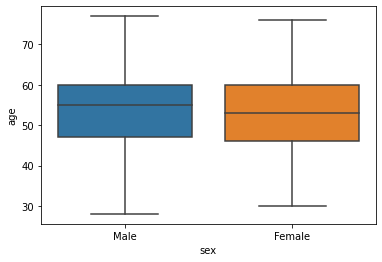

In [16]:
#Creating a boxplot
sns.boxplot(data=data,x='sex',y='age')

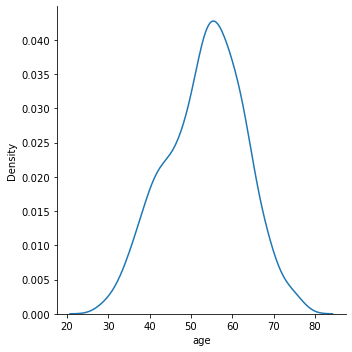

In [17]:
#Using the distribution plot to show the age distribution among the male and female
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.displot(data=data, x="age",kind="kde")

As we can see from the above boxplot and the distribution plot we can conclude that the male and female age distribution lies somewhere between 47 years to 60 years.

In [18]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


<AxesSubplot:xlabel='cp', ylabel='chol'>

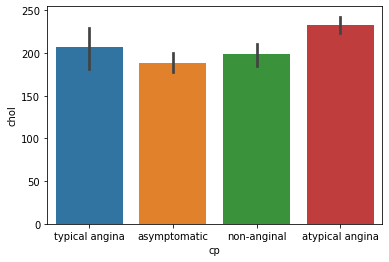

In [19]:
#to find out the relationship between the num and the cp
sns.barplot(data=data, x="cp", y="chol")

#### We know that:
  cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina

chol: The person’s cholesterol measurement in mg/dl

Hence we can say that a person with a higher cholestrol level is more likely to suffer chest pain

<AxesSubplot:>

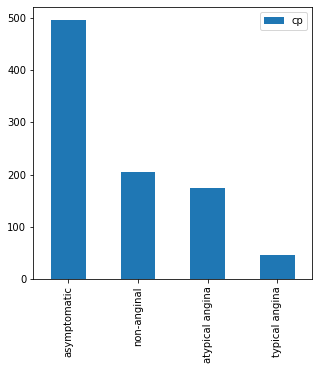

In [20]:
pd.DataFrame(data['cp'].value_counts()).plot(kind='bar',figsize=(5,5))

array([<AxesSubplot:ylabel='sex'>], dtype=object)

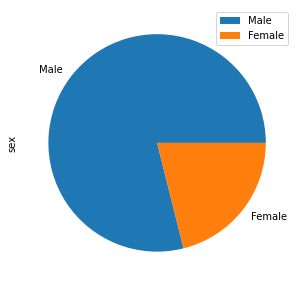

In [21]:
#To find the proportion of male and female in the dataset given 
pd.DataFrame(data['sex'].value_counts()).plot(kind='pie',subplots=True,figsize=(5,5))

As we can see from the above pie chart that the majority of the people in the dataset are male, and less than 1/4 of the patients are female. 

### Dataset Contributors:
As we already know that the whole dataset is actually an amalgamation of four different independent studies. However, after cleaning, let's have a look at he propotion of the data of different contributors.

array([<AxesSubplot:ylabel='dataset'>], dtype=object)

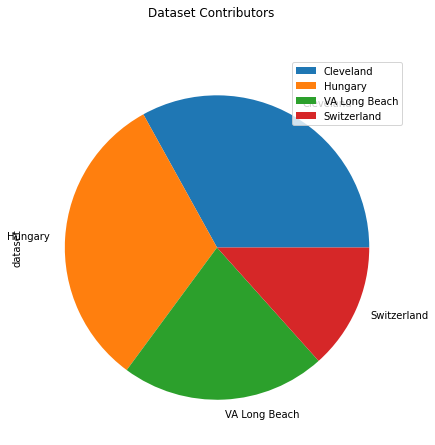

In [22]:
pd.DataFrame(data['dataset'].value_counts()).plot(kind='pie',subplots=True,figsize=(7,7),title="Dataset Contributors")

UCI dataset has collected data from numerous datasets like that from cleveland,Hungary,VA Long Beach,Switzerland

<AxesSubplot:xlabel='num', ylabel='chol'>

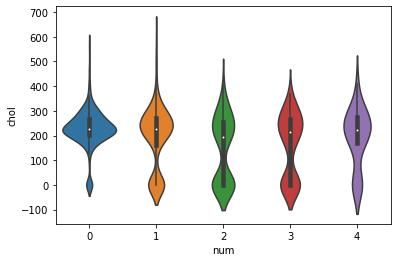

In [23]:
sns.violinplot(data=data,x="num",y="chol")

This is the cholestrol level distribution for the different stages of the heart disease where:

num = 0 -- No Heart Disease

num = 1 -- Stage 1

num = 2 -- Stage 2

num = 3 -- Stage 3

num = 4 -- Stage 4

In [24]:
#Describing the data we have with some stats
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.545665,0.878788,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.138494,1.053774,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,138.000000,0.800000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 107.9+ KB


In [26]:
#to find out the correlation between the different attributes
corr=data.corr()

In [27]:
corr

,id,age,trestbps,chol,thalch,oldpeak,num
id,1.000000,0.239301,0.039382,-0.370721,-0.436795,0.046473,0.273552
age,0.239301,1.000000,0.230784,-0.086010,-0.353471,0.248082,0.339596
trestbps,0.039382,0.230784,1.000000,0.089484,-0.104143,0.159609,0.113178
chol,-0.370721,-0.086010,0.089484,1.000000,0.226203,0.043491,-0.230539
thalch,-0.436795,-0.353471,-0.104143,0.226203,1.000000,-0.149630,-0.351055
oldpeak,0.046473,0.248082,0.159609,0.043491,-0.149630,1.000000,0.421907
num,0.273552,0.339596,0.113178,-0.230539,-0.351055,0.421907,1.000000


<AxesSubplot:>

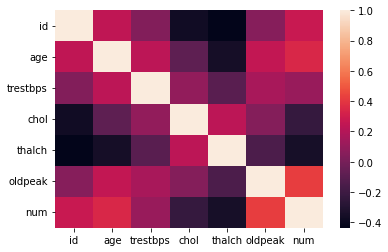

In [28]:
#Creating a heatmap to get a proper visualization on the correlation between the different features
sns.heatmap(corr)

This shows the correlation among the different attributes contributing to a heart disease

Text(0.5, 1.0, 'thalch vs age')

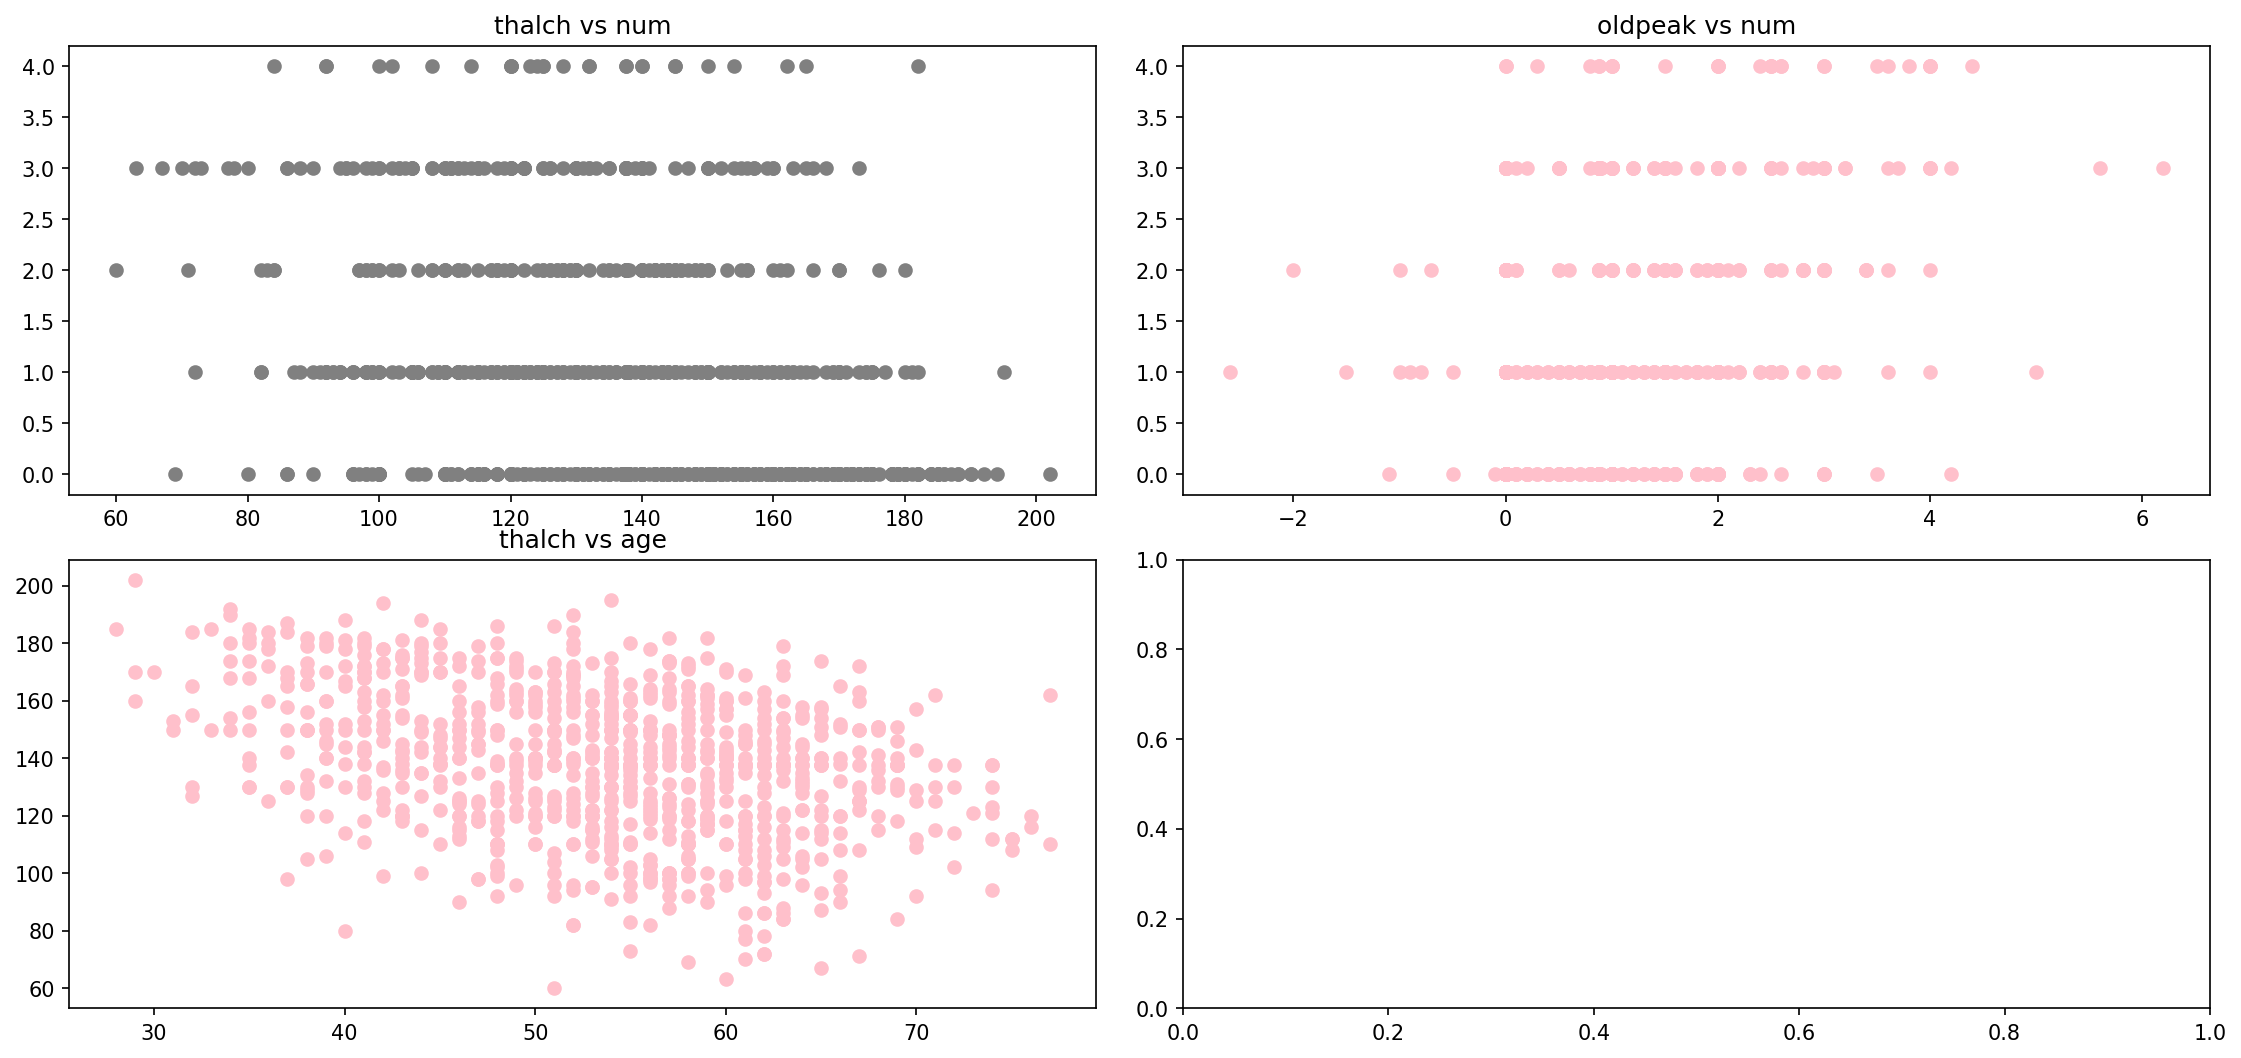

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7), dpi=150)
plt.tight_layout()
ax[0,0].scatter(x='thalch', y='num',data=data, color='gray')
ax[0,0].set_title('thalch vs num')


ax[0,1].scatter(x='oldpeak', y='num',data=data, color='pink')
ax[0,1].set_title('oldpeak vs num')

ax[1,0].scatter(x='age', y='thalch',data=data, color='pink')
ax[1,0].set_title('thalch vs age')



Text(0.5, 1.0, 'chol vs age')

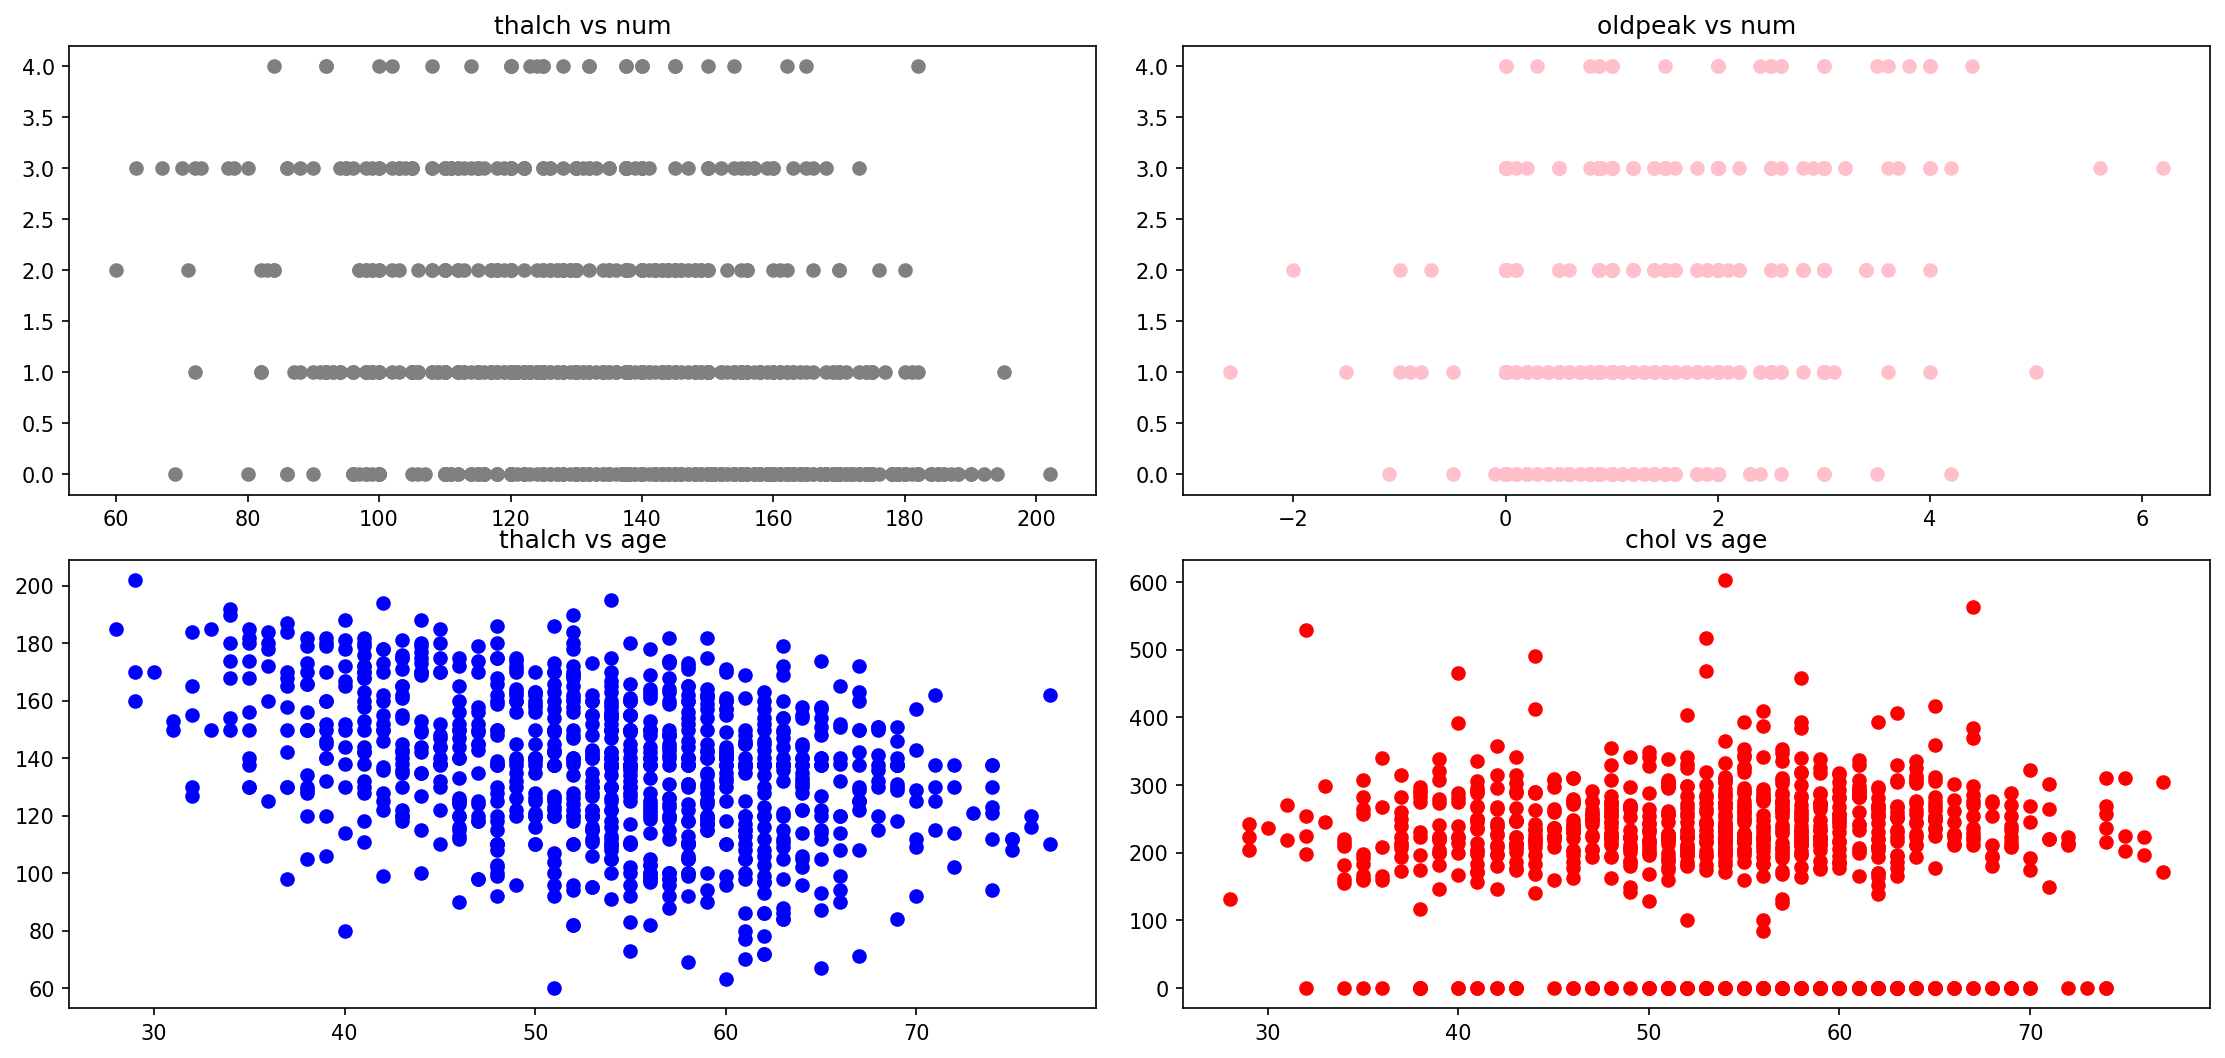

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7), dpi=150)
plt.tight_layout()
ax[0,0].scatter(x='thalch', y='num',data=data, color='gray')
ax[0,0].set_title('thalch vs num')

ax[0,1].scatter(x='oldpeak', y='num',data=data, color='pink')
ax[0,1].set_title('oldpeak vs num')

ax[1,0].scatter(x='age', y='thalch',data=data, color='blue')
ax[1,0].set_title('thalch vs age')

ax[1,1].scatter(x='age', y='chol',data=data, color='red')
ax[1,1].set_title('chol vs age')

## One hot encoding:
Let us convert the given data into numbers:

In [31]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [32]:
data.drop(columns=['id'],inplace=True)

In [33]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [34]:
data.loc[data["num"] == 2,"num"]=1
data.loc[data["num"] ==3,"num"]=1
data.loc[data["num"] ==4,"num"]=1

In [35]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [37]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [39]:
#This procedure is used for converting all values into numerical values
from sklearn.preprocessing import LabelEncoder
enc_sex=LabelEncoder()
enc_dataset=LabelEncoder()
enc_cp=LabelEncoder()
enc_fbs=LabelEncoder()
enc_restecg=LabelEncoder()
enc_exang=LabelEncoder()
enc_slope=LabelEncoder()
enc_thal=LabelEncoder()
data['sex_m']=enc_sex.fit_transform(data['sex'])


In [40]:
#tranforming the column dataset and cp
data['dataset_m']=enc_dataset.fit_transform(data['dataset'])
data['cp_m']=enc_cp.fit_transform(data['cp'])


In [46]:
#transforming the column thal
data['thal_m']=enc_thal.fit_transform(data['thal'])

In [51]:
#tranforming the column slope and exang
data['slope_m']=enc_slope.fit_transform(data['slope'])
data.loc[data["exang"] ==True,"exang"]=1
data.loc[data["exang"] ==False,"exang"]=0
data.loc[data["fbs"] ==True,"fbs"]=1
data.loc[data["fbs"] ==False,"fbs"]=0


In [52]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_m,dataset_m,cp_m,restecg_m,thal_m,slope_m
0,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,fixed defect,0,1,0,3,0,0,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,normal,1,1,0,0,0,1,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,reversable defect,1,1,0,0,0,2,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,normal,0,1,0,2,1,1,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,normal,0,0,0,1,0,1,2


In [55]:
#Dropping the unnecessary columns
new_data=data.drop(columns=['sex','dataset','cp','restecg','slope','thal'])

In [56]:
#Extracting the information about the dataset 
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        920 non-null    int64  
 1   trestbps   920 non-null    float64
 2   chol       920 non-null    float64
 3   fbs        920 non-null    object 
 4   thalch     920 non-null    float64
 5   exang      920 non-null    object 
 6   oldpeak    920 non-null    float64
 7   num        920 non-null    int64  
 8   sex_m      920 non-null    int32  
 9   dataset_m  920 non-null    int32  
 10  cp_m       920 non-null    int32  
 11  restecg_m  920 non-null    int32  
 12  thal_m     920 non-null    int32  
 13  slope_m    920 non-null    int32  
dtypes: float64(4), int32(6), int64(2), object(2)
memory usage: 79.2+ KB


In [61]:
#Now since the data has been converted into all numerical values. We can split up the data into two sets
X=new_data.drop(columns=['exang','num','fbs'])
y=new_data['num']

In [63]:
X

,age,trestbps,chol,thalch,oldpeak,sex_m,dataset_m,cp_m,restecg_m,thal_m,slope_m
0,63,145.0,233.0,150.000000,2.300000,1,0,3,0,0,0
1,67,160.0,286.0,108.000000,1.500000,1,0,0,0,1,1
2,67,120.0,229.0,129.000000,2.600000,1,0,0,0,2,1
3,37,130.0,250.0,187.000000,3.500000,1,0,2,1,1,0
4,41,130.0,204.0,172.000000,1.400000,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.000000,0.000000,0,3,0,2,1,1
916,62,130.0,139.0,137.545665,0.878788,1,3,3,2,1,1
917,55,122.0,223.0,100.000000,0.000000,1,3,0,2,0,1
918,58,130.0,385.0,137.545665,0.878788,1,3,0,0,1,1


In [64]:
y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64

In [69]:
#Splitting the data as training and testing data
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=0)


In [71]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

In [73]:
#Fitting the model
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
#Predicting the output values for the given test values
y_pred= classifier.predict(X_test)  

In [75]:
#Prediction given by y_pred
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [79]:
#Building the confusion matrix
cm= confusion_matrix(y_test, y_pred)  
cm

array([[57, 23],
       [32, 72]], dtype=int64)

In [80]:
#Taking out the classification report
classification_report(y_test ,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.64      0.71      0.67        80\n           1       0.76      0.69      0.72       104\n\n    accuracy                           0.70       184\n   macro avg       0.70      0.70      0.70       184\nweighted avg       0.71      0.70      0.70       184\n'

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7010869565217391

As we can see, We have achieved an accuracy score of about 70% by using the Decision Tree Classification algorithm. 
Let us try out some other algorithms to get a better accuracy score

In [83]:
#Using Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [84]:
y_prediction = gnb.predict(X_test)

In [86]:
#Trying to find the accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_prediction)*100

80.43478260869566